In [168]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import numba, argparse, gzip, pickle, os
import matplotlib.pyplot as plt
import pandas as pd
from cosmojo.universe import *
from cosmojo.pairwise import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
pw_theory = BinPairwise(Cosmo({'H0':71, 'omch2':0.110902, 'ombh2':0.02258, 'sigma8':0.8}), 0.1, 0.8, 1, 0.001, 300, 300, fsky=1., M_min=1e14, M_max=3e14 )

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/CosMojo-0.1.0-py2.7.egg/cosmojo/universe.py:507: RuntimeWarning: divide by zero encountered in divide
  fact = 2.*np.pi/(ls*(ls+1)) * 1.e12 * self.pars.TCMB**2.
/Users/fbianchini/anaconda2/lib/python2.7/site-packages/CosMojo-0.1.0-py2.7.egg/cosmojo/universe.py:515: RuntimeWarning: invalid value encountered in multiply
  cls[:,i] *= fact


In [182]:
v_theory = pw_theory.V_Delta[0]

In [8]:
folder_pw = '../../data/pairwise/'

In [119]:
fname_vel                                   = os.path.join(folder_pw, 'pw_vel_Flender_footprintSPT-SZ_Soergel_0.1_z_0.8_1e14_M200_3e14.pkl.gz')
fname_kSZ                                   = os.path.join(folder_pw, 'pw_T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14.pkl.gz')
fname_kSZ_photoz                            = os.path.join(folder_pw, 'pw_T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pkl.gz')
fname_kSZ_CMB_SPTSZnoise                    = os.path.join(folder_pw, 'pw_T_kSZ_Flender_CMB_noise18muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14.pkl.gz')
fname_kSZ_tSZ_CMB_SPTSZnoise                = os.path.join(folder_pw, 'pw_T_kSZ_tSZ_Flender_CMB_noise18muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14.pkl.gz')
fname_kSZ_tSZ_CMB_SPTSZ_noise_photoz        = os.path.join(folder_pw, 'pw_T_kSZ_tSZ_Flender_CMB_noise18muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pkl.gz')
fname_kSZ_tSZ_CMB_SPTpol_noise_photoz       = os.path.join(folder_pw, 'pw_T_kSZ_tSZ_Flender_CMB_noise5muK_fwhm1.2arcmin_footprintSPTpol_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pkl.gz')
fname_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz = os.path.join(folder_pw, 'pw_T_kSZ_tSZ_Flender_CMB_noise18muK_noise5muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_footprint2SPTpol_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pkl.gz')
fname_kSZ_tSZ_CMB_SPT3G_noise_photoz        = os.path.join(folder_pw, 'pw_T_kSZ_tSZ_Flender_CMB_noise5muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pkl.gz')



In [120]:
pw_vel                                   = pickle.load(gzip.open( fname_vel                                   ,'rb'))
pw_kSZ                                   = pickle.load(gzip.open( fname_kSZ                                   ,'rb'))
pw_kSZ_photoz                            = pickle.load(gzip.open( fname_kSZ_photoz                            ,'rb'))
pw_kSZ_CMB_SPTSZnoise                    = pickle.load(gzip.open( fname_kSZ_CMB_SPTSZnoise                    ,'rb'))
pw_kSZ_tSZ_CMB_SPTSZnoise                = pickle.load(gzip.open( fname_kSZ_tSZ_CMB_SPTSZnoise                ,'rb'))
pw_kSZ_tSZ_CMB_SPTSZ_noise_photoz        = pickle.load(gzip.open( fname_kSZ_tSZ_CMB_SPTSZ_noise_photoz        ,'rb'))
pw_kSZ_tSZ_CMB_SPTpol_noise_photoz       = pickle.load(gzip.open( fname_kSZ_tSZ_CMB_SPTpol_noise_photoz       ,'rb'))
pw_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz = pickle.load(gzip.open( fname_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz ,'rb'))
pw_kSZ_tSZ_CMB_SPT3G_noise_photoz        = pickle.load(gzip.open( fname_kSZ_tSZ_CMB_SPT3G_noise_photoz        ,'rb')) 

In [284]:
def PlotCorr(dic, tag='pw_T_corr', title='', cmap='inferno', vmin=0, vmax=1, savefig=None):
    plt.imshow(dic[tag], vmin=vmin, vmax=vmax, cmap='inferno', extent=[dic['r_min'],dic['r_max'],dic['r_min'],dic['r_max']])
    plt.colorbar()
    plt.xlabel(r'$r$ [Mpc]', size=15)
    plt.ylabel(r'$r$ [Mpc]', size=15)
    plt.suptitle(title, y=1.01)
#     plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, bboxes_inches='tight')

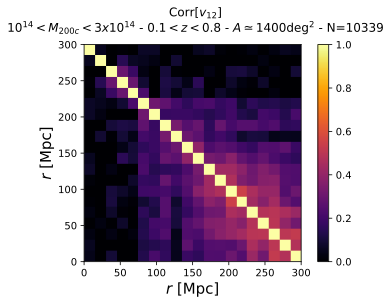

In [285]:
PlotCorr(pw_vel, tag='pw_vel_corr', title='Corr[$v_{12}$]\n$10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_vel)['N_clusts'],
        savefig='/Users/fbianchini/Research/kSZ/plots/corr_pw_vel_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_0.1_z_0.8_1e14_M200_3e14.pdf')

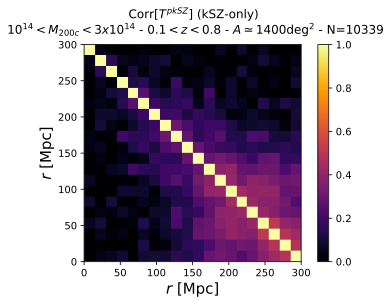

In [286]:
PlotCorr(pw_kSZ, tag='pw_T_corr', 
         title='Corr[$T^{pkSZ}$] (kSZ-only) \n$10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_vel)['N_clusts'],
                 savefig='/Users/fbianchini/Research/kSZ/plots/corr_pw_T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_0.1_z_0.8_1e14_M200_3e14.pdf')

## Pairwise velocity plot

In [233]:
def PlotVelAll(dic, title='', theory=None, savefig=None):
    err_pw_vel            = np.sqrt(np.diag(dic['pw_vel_cov']))
    err_pw_flip_vel       = np.sqrt(np.diag(dic['pw_flip_vel_cov']))
    err_pw_resh_zs_vel    = np.sqrt(np.diag(dic['pw_resh_zs_vel_cov']))
    err_pw_resh_vlos_vel  = np.sqrt(np.diag(dic['pw_resh_vlos_vel_cov']))
    
#     plt.fill_between(dic['r'], dic['pw_T']     + err_pw_T            , dic['pw_T']            - err_pw_T           , color='grey',alpha=0.5, label='Sims')
    plt.fill_between(dic['r'], -dic['pw_flip_vel']      - err_pw_flip_vel       , -dic['pw_flip_vel']       + err_pw_flip_vel      , color='red',alpha=0.5, label='Flip-sign')
    plt.fill_between(dic['r'], -dic['pw_resh_zs_vel']   - err_pw_resh_zs_vel    , -dic['pw_resh_zs_vel']    + err_pw_resh_zs_vel   , color='y',alpha=0.5, label=r'Reshuffle $z$')
    plt.fill_between(dic['r'], -dic['pw_resh_vlos_vel'] - err_pw_resh_vlos_vel ,  -dic['pw_resh_vlos_vel']  + err_pw_resh_vlos_vel , color='cyan',alpha=0.5, label=r'Reshuffle $v$')
    
#     plt.plot(r, pw_T,'k-') 
    plt.errorbar(dic['r'], -dic['pw_vel'], yerr=err_pw_vel, color='k', fmt='o', ms=2, label='Sims') 
    plt.plot(dic['r'], -dic['pw_flip_vel']      ,'r--')
    plt.plot(dic['r'], -dic['pw_resh_zs_vel']   ,'y--')
    plt.plot(dic['r'], -dic['pw_resh_vlos_vel'],'--',c='cyan')
    
    if theory is not None:
        plt.plot(theory, color='grey', label='Theory')
    
    plt.axhline(ls='-',c='grey')
    plt.grid()
    plt.legend()
    plt.ylabel(r'$v $ [km/s]',size=15)
    plt.xlabel(r'$r$ [Mpc]',size=15)
    plt.xlim(0,300)
    plt.ylim(-600,100)
    plt.title(title,y=1.02)
    
    plt.tight_layout()
    
    if savefig is not None:
        plt.savefig(savefig)


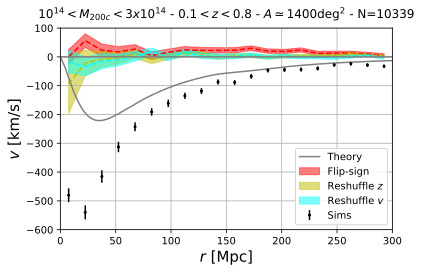

In [272]:
PlotVelAll(pw_vel, \
           theory=v_theory, \
           title=r'$10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_vel)['N_clusts'],
          savefig='/Users/fbianchini/Research/kSZ/plots/pw_vel_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_0.1_z_0.8_1e14_M200_3e14.pdf')

## kSZ pairwise plot

In [192]:
def PlotkSZAll(dic, title='', savefig=None):
    err_pw_T            = np.sqrt(np.diag(dic['pw_T_cov']))
    err_pw_flip_T       = np.sqrt(np.diag(dic['pw_flip_T_cov']))
    err_pw_resh_zs_T    = np.sqrt(np.diag(dic['pw_resh_zs_T_cov']))
    err_pw_resh_T_kSZ_T = np.sqrt(np.diag(dic['pw_resh_T_kSZ_T_cov']))
    
#     plt.fill_between(dic['r'], dic['pw_T']            + err_pw_T            , dic['pw_T']            - err_pw_T           , color='grey',alpha=0.5, label='Sims')
    plt.fill_between(dic['r'], dic['pw_flip_T']       + err_pw_flip_T       , dic['pw_flip_T']       - err_pw_flip_T      , color='red',alpha=0.5, label='Flip-sign')
    plt.fill_between(dic['r'], dic['pw_resh_zs_T']    + err_pw_resh_zs_T    , dic['pw_resh_zs_T']    - err_pw_resh_zs_T   , color='y',alpha=0.5, label=r'Reshuffle $z$')
    plt.fill_between(dic['r'], dic['pw_resh_T_kSZ_T'] + err_pw_resh_T_kSZ_T , dic['pw_resh_T_kSZ_T'] - err_pw_resh_T_kSZ_T, color='cyan',alpha=0.5, label=r'Reshuffle $T$')
    
#     plt.plot(r, pw_T,'k-') 
    plt.errorbar(dic['r'], dic['pw_T'], yerr=err_pw_T, color='k', fmt='o', ms=2, label='Sims') 
    plt.plot(dic['r'], dic['pw_flip_T']      ,'r--')
    plt.plot(dic['r'], dic['pw_resh_zs_T']   ,'y--')
    plt.plot(dic['r'], dic['pw_resh_T_kSZ_T'],'--',c='cyan')
    plt.axhline(ls='-',c='grey')
    plt.grid()
    plt.legend()
    plt.ylabel(r'$T_{\rm pkSZ} \,[\mu$K]',size=15)
    plt.xlabel(r'$r$ [Mpc]',size=15)
    plt.xlim(0,300)
    plt.ylim(-3,1)
    plt.title(title, y=1.02)
    
    plt.tight_layout()
    
    if savefig is not None:
        plt.savefig(savefig)


In [240]:
def PlotkSZMany(dics, labs, title='', dl=5, shade=False, savefig=None):
    for i in range(len(dics)):
        r = dics[i]['r']
        pw = dics[i]['pw_T'] 
        err = np.sqrt(np.diag(dics[i]['pw_T_cov'])) 
        cov = dics[i]['pw_T_cov']
        fact = (dics[i]['N_bootstraps'] - len(dics[i]['r']) - 2.)/(dics[i]['N_bootstraps']-1)
        inv_cov = np.linalg.inv(cov) * fact
        chi2 = np.dot(pw[3:],np.dot(inv_cov[3:,3:],pw[3:]))
        plt.errorbar(r+i, pw, yerr=err, fmt='o', ms=2, label=labs[i]+' %.1f'%(np.sqrt(chi2))) 
        if shade:
            plt.axvspan(0,50,color='grey',alpha=0.4)

    plt.axhline(ls='-',c='grey')
    plt.grid()
    plt.legend()
    plt.ylabel(r'$T_{\rm pkSZ} \,[\mu$K]',size=15)
    plt.xlabel(r'$r$ [Mpc]',size=15)
    plt.xlim(0,300)
    plt.ylim(-3,1)
    plt.title(title, y=1.02)
    
    plt.tight_layout()
    
    if savefig is not None:
        plt.savefig(savefig)


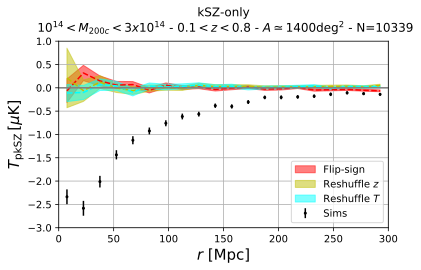

In [265]:
PlotkSZAll(pw_kSZ,
           title='kSZ-only\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ)['N_clusts'],\
           savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14.pdf')

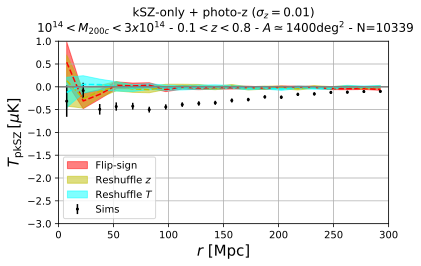

In [266]:
PlotkSZAll(pw_kSZ_photoz,
          title='kSZ-only + photo-z ($\sigma_z=0.01$)\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ)['N_clusts'],\
          savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pdf')

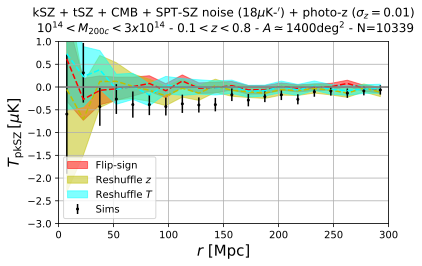

In [267]:
PlotkSZAll(pw_kSZ_tSZ_CMB_SPTSZ_noise_photoz,
           title='kSZ + tSZ + CMB + SPT-SZ noise (18$\mu$K-$^{\prime}$) + photo-z ($\sigma_z=0.01$)\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ_tSZ_CMB_SPTSZ_noise_photoz)['N_clusts'],\
           savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_tSZ_Flender_CMB_noise18muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pdf')



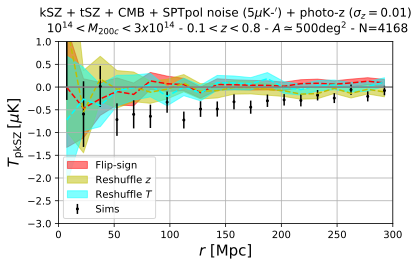

In [271]:
PlotkSZAll(pw_kSZ_tSZ_CMB_SPTpol_noise_photoz,
           title='kSZ + tSZ + CMB + SPTpol noise (5$\mu$K-$^{\prime}$) + photo-z ($\sigma_z=0.01$)\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 500 $deg$^2$ - N=%d'%(pw_kSZ_tSZ_CMB_SPTpol_noise_photoz)['N_clusts'],\
           savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_tSZ_Flender_CMB_noise5muK_fwhm1.2arcmin_footprintSPTpol_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pdf')




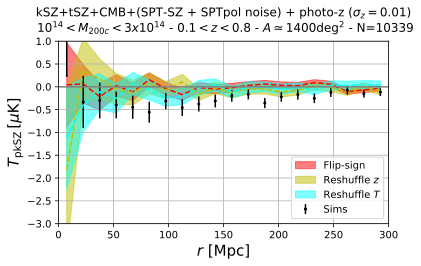

In [269]:
PlotkSZAll(pw_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz,\
           title='kSZ+tSZ+CMB+(SPT-SZ + SPTpol noise) + photo-z ($\sigma_z=0.01$)\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz)['N_clusts'],
          savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_tSZ_Flender_CMB_noise18muK_noise5muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_footprint2SPTpol_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pdf')



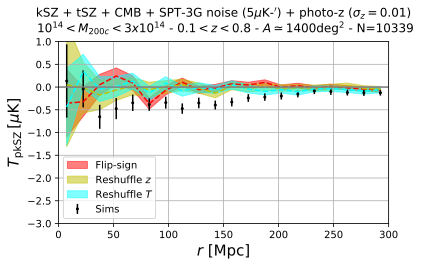

In [270]:
PlotkSZAll(pw_kSZ_tSZ_CMB_SPT3G_noise_photoz,\
           title='kSZ + tSZ + CMB + SPT-3G noise (5$\mu$K-$^{\prime}$) + photo-z ($\sigma_z=0.01$)\n $10^{14} < M_{200c} < 3x10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ_tSZ_CMB_SPT3G_noise_photoz)['N_clusts'],
          savefig='/Users/fbianchini/Research/kSZ/plots/pw_T_kSZ_tSZ_Flender_CMB_noise5muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_theta2.0arcmin_AP_0.1_z_0.8_1e14_M200_3e14_sigmaphz0.01.pdf')



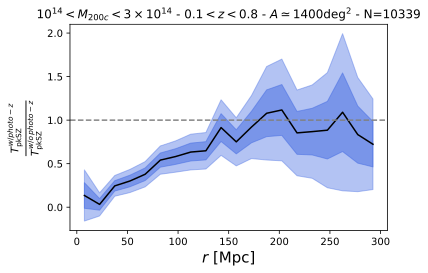

In [263]:
err_kSZ        = np.sqrt(np.diag(pw_kSZ['pw_T_cov']))
err_kSZ_photoz = np.sqrt(np.diag(pw_kSZ_photoz['pw_T_cov']))
ratio          = pw_kSZ_photoz['pw_T']/pw_kSZ['pw_T']
err_ratio      = np.abs(ratio) * np.sqrt( (err_kSZ_photoz/pw_kSZ_photoz['pw_T'])**2 + (err_kSZ/pw_kSZ['pw_T'])**2 ) 
plt.fill_between(pw_kSZ['r'], ratio-err_ratio, ratio+err_ratio, color='royalblue', alpha=0.5)
plt.fill_between(pw_kSZ['r'], ratio-2*err_ratio, ratio+2*err_ratio, color='royalblue', alpha=0.4)
plt.plot(pw_kSZ['r'], ratio, 'k')
plt.axhline(1, ls='--', c='grey')
plt.ylabel(r'$\frac{T_{\rm pkSZ}^{w/ photo-z}}{T_{\rm pkSZ}^{w/o\,photo-z}} $',size=15)
plt.xlabel(r'$r$ [Mpc]',size=15)
plt.title(r'$10^{14} < M_{200c} < 3\times 10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ)['N_clusts'])
plt.tight_layout()
plt.savefig('/Users/fbianchini/Research/kSZ/plots/effect_photoz.pdf')

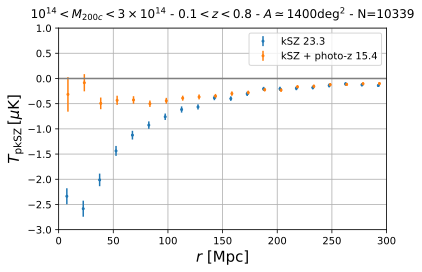

In [264]:
PlotkSZMany([pw_kSZ, pw_kSZ_photoz], 
            labs=['kSZ', 'kSZ + photo-z'], 
            title=r'$10^{14} < M_{200c} < 3\times 10^{14}$ - $0.1 < z < 0.8$ - $A \simeq 1400 $deg$^2$ - N=%d'%(pw_kSZ)['N_clusts'],
           savefig='/Users/fbianchini/Research/kSZ/plots/pw_effect_photoz.pdf')

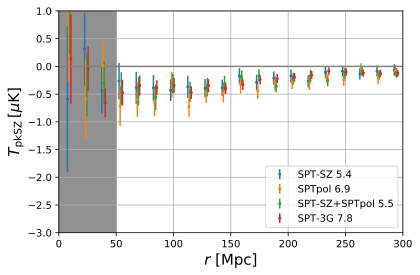

In [243]:
exps = [pw_kSZ_tSZ_CMB_SPTSZ_noise_photoz,\
        pw_kSZ_tSZ_CMB_SPTpol_noise_photoz,\
        pw_kSZ_tSZ_CMB_SPTSZ_SPTpol_noise_photoz,\
        pw_kSZ_tSZ_CMB_SPT3G_noise_photoz]
labs = ['SPT-SZ','SPTpol','SPT-SZ+SPTpol','SPT-3G']
PlotkSZMany(exps, labs, shade=True, savefig='/Users/fbianchini/Research/kSZ/plots/SPT_landscape.pdf')
            
            
            
            
            

In [222]:
pw_kSZ['N_bootstraps']

300

In [250]:
pw_kSZ_tSZ_CMB_SPTpol_noise_photoz.keys()

['pw_flip_T_corr',
 'pw_flip_T_cov',
 'M_min',
 'pw_resh_zs_T_corr',
 'sigma_z',
 'pw_resh_T_kSZ_T_cov',
 'reshuffle_temperatures',
 'pw_resh_zs_T',
 'do_velocity',
 'fname_cat',
 'z_max',
 'r',
 'N_bootstraps',
 'pw_T_corr',
 'r_min',
 'z_min',
 'N_clusts',
 'reshuffle_redshift',
 'nbins',
 'pw_resh_T_kSZ_T',
 'do_temperature',
 'sigma_photoz',
 'pw_resh_zs_T_cov',
 'pw_T_cov',
 'fname_output',
 'pw_T',
 'apply_debiasing',
 'Om0',
 'r_max',
 'M_max',
 'pw_resh_T_kSZ_T_corr',
 'pw_flip_T',
 'H0',
 'bins']